Four visualization approaches created:
1. Normalized chart (0-1 scale)
2. Stacked percentage chart
3. Small multiples/faceted chart
4. Log scale chart


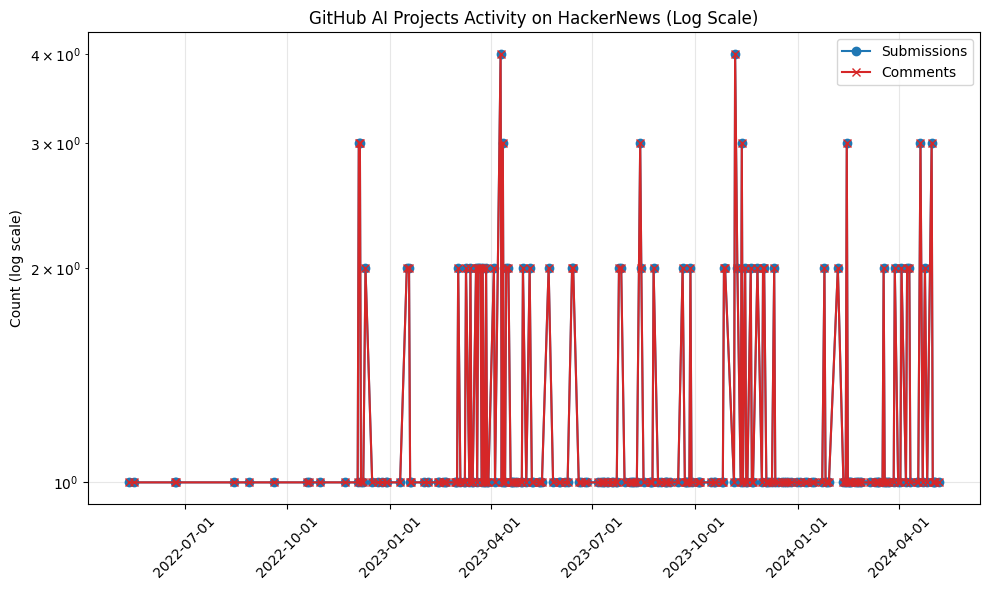

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# load story dataframe from external csv
comments_df = pd.read_csv("./rq1_stories_github_valid_projs_only_292.csv")

# load comment datafrrame from external csv
stories_df = pd.read_csv("./rq1_stories_github_valid_projs_only_292.csv")

# # Sample data (same as before)
# stories_df = pd.DataFrame({
#     'discussion_id': [31355348, 31356789, 31358901, 31360123],
#     'title': [
#         "BlindAI: Open-source, fast and privacy-friendly AI deployment solution in Rust",
#         "DiffGPT: An Open-Source GPT Model for Code Review",
#         "GradVis: Interactive Visualization Tool for Neural Networks",
#         "AIDebugger: Real-time monitoring for ML models"
#     ],
#     'url': [
#         "https://github.com/mithril-security/blindai",
#         "https://github.com/example/diffgpt",
#         "https://github.com/example/gradvis",
#         "https://github.com/example/aidebugger"
#     ],
#     'date': [1652368380, 1652454780, 1652541180, 1652627580]
# })

# # Comments data - same time period but with more comments to show scale difference
# comments_df = pd.DataFrame({
#     'discussion_id': [31355348, 31355348, 31356789, 31358901, 31358901, 31358901, 31360123, 31360123, 31360123, 31355348] + [31356789]*20,
#     'comment_id': list(range(1001, 1031)),
#     'date': [1652368980, 1652372580, 1652458380, 1652544780, 1652548380, 1652551980, 1652631180, 1652634780, 1652638380, 1652375980] + [1652461980]*20
# })

# Convert Unix timestamps to datetime
stories_df['datetime'] = pd.to_datetime(stories_df['date'], unit='s')
comments_df['datetime'] = pd.to_datetime(comments_df['date'], unit='s')

# Group by day and count submissions/comments
stories_daily = stories_df.groupby(stories_df['datetime'].dt.date).size().reset_index(name='submissions')
comments_daily = comments_df.groupby(comments_df['datetime'].dt.date).size().reset_index(name='comments')

# Convert date strings back to datetime objects for proper plotting
stories_daily['datetime'] = pd.to_datetime(stories_daily['datetime'])
comments_daily['datetime'] = pd.to_datetime(comments_daily['datetime'])

# Merge the datasets for aligned dates
merged_df = pd.merge(stories_daily, comments_daily, on='datetime', how='outer').fillna(0)
merged_df = merged_df.sort_values('datetime')

# Approach 1: Normalized chart (0-1 scale)
fig, ax = plt.subplots(figsize=(10, 6))

# Normalize both metrics to 0-1 scale
submissions_norm = merged_df['submissions'] / merged_df['submissions'].max()
comments_norm = merged_df['comments'] / merged_df['comments'].max()

ax.plot(merged_df['datetime'], submissions_norm, color='tab:blue', marker='o', label='Submissions (normalized)')
ax.plot(merged_df['datetime'], comments_norm, color='tab:red', marker='x', label='Comments (normalized)')

# Format x-axis dates
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

ax.set_ylabel('Normalized Value (0-1)')
ax.set_title('Normalized GitHub AI Projects Activity on HackerNews')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.savefig('normalized_chart.png')
plt.close()

# Approach 2: Stacked percentage chart
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate percentages
total = merged_df['submissions'] + merged_df['comments']
submissions_pct = merged_df['submissions'] / total * 100
comments_pct = merged_df['comments'] / total * 100

# Create stacked percentage chart
ax.stackplot(merged_df['datetime'], [submissions_pct, comments_pct],
             labels=['Submissions', 'Comments'],
             colors=['tab:blue', 'tab:red'],
             alpha=0.7)

# Format x-axis dates
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

ax.set_ylabel('Percentage of Total Activity (%)')
ax.set_title('Relative Distribution of GitHub AI Projects Activity')
ax.grid(True, alpha=0.3)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig('percentage_chart.png')
plt.close()

# Approach 3: Small multiples / faceted chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot submissions
ax1.plot(merged_df['datetime'], merged_df['submissions'], color='tab:blue', marker='o')
ax1.set_ylabel('Submissions')
ax1.set_title('GitHub AI Project Submissions')
ax1.grid(True, alpha=0.3)

# Plot comments
ax2.plot(merged_df['datetime'], merged_df['comments'], color='tab:red', marker='x')
ax2.set_ylabel('Comments')
ax2.set_title('Comments on GitHub AI Projects')
ax2.grid(True, alpha=0.3)

# Format x-axis dates
ax2.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Add shared x-axis label
fig.text(0.5, 0.04, 'Date', ha='center')
plt.tight_layout()
plt.savefig('faceted_chart.png')
plt.close()

# Approach 4: Log scale chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot both metrics on log scale
ax.semilogy(merged_df['datetime'], merged_df['submissions'], color='tab:blue', marker='o', label='Submissions')
ax.semilogy(merged_df['datetime'], merged_df['comments'], color='tab:red', marker='x', label='Comments')

# Format x-axis dates
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

ax.set_ylabel('Count (log scale)')
ax.set_title('GitHub AI Projects Activity on HackerNews (Log Scale)')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.savefig('log_scale_chart.png')

# Display a message indicating plots have been created
print("Four visualization approaches created:")
print("1. Normalized chart (0-1 scale)")
print("2. Stacked percentage chart")
print("3. Small multiples/faceted chart")
print("4. Log scale chart")